# Generate Data

In [1]:
from causalkit.data import CausalDatasetGenerator, CausalData
from causalkit.eda import CausalEDA
import numpy as np

/Users/ioannmartynov/miniconda3/envs/causalkit/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
gen = CausalDatasetGenerator(
    theta=2.0,
    beta_y=np.array([1.0, -0.5, 0.2]),
    beta_t=np.array([0.8, 1.2, -0.3]),
    target_t_rate=0.35,
    outcome_type="continuous",
    sigma_y=1.0,
    seed=42,
    confounder_specs=[
        {"name": "age", "dist": "normal", "mu": 50, "sd": 10},
        {"name": "smoker", "dist": "bernoulli", "p": 0.3},
        {"name": "bmi", "dist": "normal", "mu": 27, "sd": 4},
    ])
df = gen.generate(10_000)
df.columns

Index(['y', 't', 'age', 'smoker', 'bmi', 'propensity', 'mu0', 'mu1', 'cate'], dtype='object')

# CausalData

# EDA

In [3]:
causal_data = CausalData(
    df=df,
    treatment="t",
    target="y",
    confounders=["age", "smoker", "bmi"]
)

eda = CausalEDA(causal_data)
report = eda.design_report()

In [4]:
report["summaries"] # treatment rate, naive gap

{'treatment_rate': np.float64(0.3534),
 'outcome_by_treatment':      count       mean       std
 t                              
 0.0   6466  49.681386  7.285649
 1.0   3534  67.177361  6.238665,
 'naive_diff': np.float64(17.495974458593068)}

In [5]:
report["treat_auc"] # how predictable treatment is from X

0.9863326273637858

In [6]:
report["positivity"] # share outside [0.05, 0.95]

{'bounds': (0.05, 0.95),
 'share_below': 0.5072,
 'share_above': 0.2209,
 'flag': True}

In [7]:
report["balance"].head(10) # largest pre/post SMDs

,covariate,SMD_unweighted,SMD_weighted,flag_unw,flag_w
0,age,2.401495,0.644005,True,True
2,bmi,-0.242312,-0.062234,True,False
1,smoker,0.121438,-0.100752,True,True


In [8]:
report["weights"] # ESS and weight tails

{'ESS_all': 32.8237886194812,
 'ESS_treated': 9.382655605587717,
 'ESS_control': 1062.4517761100587,
 'w_all_quantiles': [1.0032267507960353,
  1.502365146421958,
  2.319913924378805,
  7.851582188890863,
  3040.72663861294]}

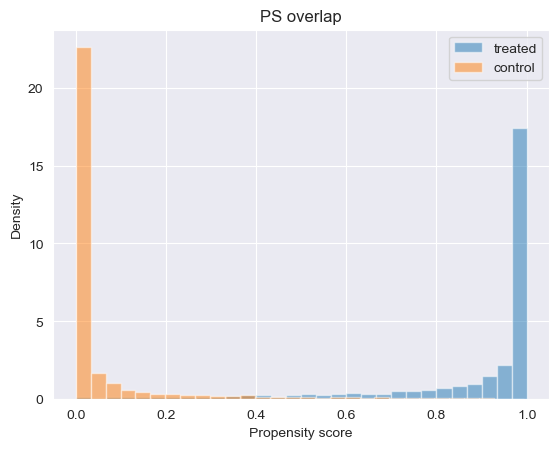

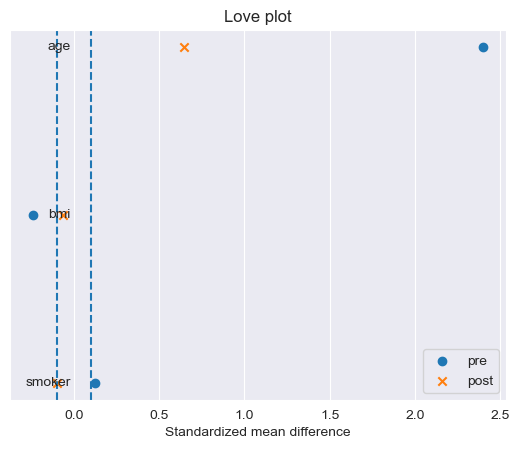

In [9]:
# Plots
ps = eda.fit_propensity()
eda.plot_ps_overlap(ps)
bal = eda.balance_table(ps)
eda.love_plot(bal)


In [3]:
df.head()

,y,t,age,smoker,bmi,propensity,mu0,mu1,cate
0,60.057239,1.0,53.047171,1.0,20.651225,8.992087e-01,56.677416,58.677416,2.0
1,47.379975,0.0,39.600159,0.0,32.502713,1.633812e-06,46.100702,48.100702,2.0
2,65.457219,1.0,57.504512,1.0,32.180623,9.085050e-01,63.440637,65.440637,2.0
3,69.484632,1.0,59.405647,0.0,35.945336,8.156292e-01,66.594714,68.594714,2.0
4,35.681310,0.0,30.489648,0.0,31.046206,1.728435e-09,36.698889,38.698889,2.0


In [ ]:
gen = CausalDatasetGenerator(
    theta=2.0,
    beta_y=np.array([1.0, -0.5, 0.2]),
    beta_t=np.array([0.8, 1.2, -0.3]),
    target_t_rate=0.35,
    outcome_type="continuous",
    sigma_y=1.0,
    seed=42,
    confounder_specs=[
        {"name": "age", "dist": "normal", "mu": 50, "sd": 10},
        {"name": "smoker", "dist": "bernoulli", "p": 0.3},
        {"name": "bmi", "dist": "normal", "mu": 27, "sd": 4},
    ])
df = gen.generate(10_000)
df.columns


# Inference